In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('Train_Test_IoT_Fridge.csv')
df2=pd.read_csv('Train_Test_IoT_Thermostat.csv')
df3=pd.read_csv('Train_Test_IoT_Weather.csv')

In [3]:
df1 = df1.rename(columns={"label": "Fridge_label", "type": "Fridge_type"})
df2 = df2.rename(columns={"label": "Thermostat_label", "type": "Thermostat_type"})
df3 = df3.rename(columns={"label": "Weather_label", "type": "Weather_type"})


In [4]:
import pandas as pd

# Assuming df1, df2, and df3 are already loaded or defined

# Stack data frames vertically
merged_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)




In [5]:
merged_df

,date,time,fridge_temperature,temp_condition,Fridge_label,Fridge_type,current_temperature,thermostat_status,Thermostat_label,Thermostat_type,temperature,pressure,humidity,Weather_label,Weather_type
0,25-Apr-19,19:19:40,9.00,high,1.0,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-Apr-19,19:19:40,9.25,high,1.0,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-Apr-19,19:19:45,12.65,high,1.0,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-Apr-19,19:19:45,4.65,low,1.0,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25-Apr-19,19:19:55,12.65,high,1.0,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111973,27-Apr-19,05:40:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.138727,-0.421404,40.661168,1.0,xss
111974,27-Apr-19,05:40:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.140147,-2.399335,68.605010,1.0,xss
111975,27-Apr-19,05:40:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.393034,4.526178,71.446893,1.0,xss
111976,27-Apr-19,05:40:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.826907,-0.421404,40.661168,1.0,xss


In [6]:
df=merged_df

In [7]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
unique_counts_per_column = df.nunique()

print(unique_counts_per_column)


date                       9
time                   41173
fridge_temperature       151
temp_condition             6
Fridge_label               2
Fridge_type                7
current_temperature    30963
thermostat_status          2
Thermostat_label           2
Thermostat_type            7
temperature            37552
pressure                5719
humidity                7833
Weather_label              2
Weather_type               8
dtype: int64


In [8]:
# Count NaN values in each column
nan_counts = merged_df.isna().sum()

# Print the counts
print(nan_counts)

date                       0
time                       0
fridge_temperature     72034
temp_condition         72034
Fridge_label           72034
Fridge_type            72034
current_temperature    79204
thermostat_status      79204
Thermostat_label       79204
Thermostat_type        79204
temperature            72718
pressure               72718
humidity               72718
Weather_label          72718
Weather_type           72718
dtype: int64


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
# Split data into sets with known and unknown door_state
train_df = df[df['fridge_temperature'].notna()]
test_df = df[df['fridge_temperature'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['fridge_temperature_encoded'] = label_encoder.fit_transform(train_df['fridge_temperature'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['fridge_temperature_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['fridge_temperature_predicted'] = model.predict(X_test)
test_df['fridge_temperature'] = label_encoder.inverse_transform(test_df['fridge_temperature_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['fridge_temperature'].isna(), 'fridge_temperature'] = test_df['fridge_temperature']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1680463259.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1680463259.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['fridge_temperature_encoded'] = label_encoder.fit_transform(train_df['fridge_temperature'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1680463259.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
# Split data into sets with known and unknown door_state
train_df = df[df['temp_condition'].notna()]
test_df = df[df['temp_condition'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['temp_condition_encoded'] = label_encoder.fit_transform(train_df['temp_condition'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['temp_condition_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['temp_condition_predicted'] = model.predict(X_test)
test_df['temp_condition'] = label_encoder.inverse_transform(test_df['temp_condition_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['temp_condition'].isna(), 'temp_condition'] = test_df['temp_condition']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2337787329.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2337787329.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['temp_condition_encoded'] = label_encoder.fit_transform(train_df['temp_condition'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2337787329.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['Fridge_label'].notna()]
test_df = df[df['Fridge_label'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['Fridge_label_encoded'] = label_encoder.fit_transform(train_df['Fridge_label'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['Fridge_label_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['Fridge_label_predicted'] = model.predict(X_test)
test_df['Fridge_label'] = label_encoder.inverse_transform(test_df['Fridge_label_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['Fridge_label'].isna(), 'Fridge_label'] = test_df['Fridge_label']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2412758618.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Fridge_label_encoded'] = label_encoder.fit_transform(train_df['Fridge_label'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2412758618.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Fridge_label_predicted'] = model.predict(X_test)
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2412758618.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['Fridge_type'].notna()]
test_df = df[df['Fridge_type'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['Fridge_type_encoded'] = label_encoder.fit_transform(train_df['Fridge_type'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['Fridge_type_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['Fridge_type_predicted'] = model.predict(X_test)
test_df['Fridge_type'] = label_encoder.inverse_transform(test_df['Fridge_type_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['Fridge_type'].isna(), 'Fridge_type'] = test_df['Fridge_type']

# Save the trained model
with open('fridgetype.pkl', 'wb') as file:
    pickle.dump(model, file)

C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2375539443.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Fridge_type_encoded'] = label_encoder.fit_transform(train_df['Fridge_type'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2375539443.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Fridge_type_predicted'] = model.predict(X_test)
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2375539443.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [13]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder

# # Sample data loading step (you will need to replace this with your actual data loading)
# # For demonstration, assume 'data.csv' is your data file
# # Optionally, remove the original date, time, and datetime columns if they are no longer needed
# #df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# # Combine date and time into one datetime column and extract relevant time components

# # Split data into sets with known and unknown door_state
# train_df = df[df['current_temperature'].notna()]
# test_df = df[df['current_temperature'].isna()]

# # Encode the categorical door_state to numerical values
# label_encoder = LabelEncoder()
# train_df['current_temperature_encoded'] = label_encoder.fit_transform(train_df['current_temperature'])

# # Select features
# features = ['month', 'day', 'hour', 'minute']
# X_train = train_df[features]
# y_train = train_df['current_temperature_encoded']

# # Training a RandomForest Classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predict the missing values in the test set
# X_test = test_df[features]
# test_df['current_temperature_predicted'] = model.predict(X_test)
# test_df['current_temperature'] = label_encoder.inverse_transform(test_df['current_temperature_predicted'])

# # Fill in the original DataFrame with the predicted values
# df.loc[df['current_temperature'].isna(), 'current_temperature'] = test_df['current_temperature']


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['thermostat_status'].notna()]
test_df = df[df['thermostat_status'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['thermostat_status_encoded'] = label_encoder.fit_transform(train_df['thermostat_status'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['thermostat_status_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['thermostat_status_predicted'] = model.predict(X_test)
test_df['thermostat_status'] = label_encoder.inverse_transform(test_df['thermostat_status_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['thermostat_status'].isna(), 'thermostat_status'] = test_df['thermostat_status']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\634567120.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['thermostat_status_encoded'] = label_encoder.fit_transform(train_df['thermostat_status'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\634567120.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['thermostat_status_predicted'] = model.predict(X_test)
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\634567120.py:32: SettingWithCopyWarning: 
A value is trying to be set on a

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['Thermostat_label'].notna()]
test_df = df[df['Thermostat_label'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['Thermostat_label_encoded'] = label_encoder.fit_transform(train_df['Thermostat_label'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['Thermostat_label_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['Thermostat_label_predicted'] = model.predict(X_test)
test_df['Thermostat_label'] = label_encoder.inverse_transform(test_df['Thermostat_label_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['Thermostat_label'].isna(), 'Thermostat_label'] = test_df['Thermostat_label']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1102804880.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Thermostat_label_encoded'] = label_encoder.fit_transform(train_df['Thermostat_label'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1102804880.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Thermostat_label_predicted'] = model.predict(X_test)
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1102804880.py:32: SettingWithCopyWarning: 
A value is trying to be set on a

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['Thermostat_type'].notna()]
test_df = df[df['Thermostat_type'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['Thermostat_type_encoded'] = label_encoder.fit_transform(train_df['Thermostat_type'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['Thermostat_type_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['Thermostat_type_predicted'] = model.predict(X_test)
test_df['Thermostat_type'] = label_encoder.inverse_transform(test_df['Thermostat_type_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['Thermostat_type'].isna(), 'Thermostat_type'] = test_df['Thermostat_type']

# Save the trained model
with open('thermostattype.pkl', 'wb') as file:
    pickle.dump(model, file)

C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1648994560.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Thermostat_type_encoded'] = label_encoder.fit_transform(train_df['Thermostat_type'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1648994560.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Thermostat_type_predicted'] = model.predict(X_test)
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1648994560.py:32: SettingWithCopyWarning: 
A value is trying to be set on a co

In [17]:
# Count NaN values in each column
nan_counts = merged_df.isna().sum()

# Print the counts
print(nan_counts)

date                       0
time                       0
fridge_temperature         0
temp_condition             0
Fridge_label               0
Fridge_type                0
current_temperature    79204
thermostat_status          0
Thermostat_label           0
Thermostat_type            0
temperature            72718
pressure               72718
humidity               72718
Weather_label          72718
Weather_type           72718
datetime                   0
day                        0
month                      0
hour                       0
minute                     0
dtype: int64


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
# df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['current_temperature'].notna()]
test_df = df[df['current_temperature'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['current_temperature_encoded'] = label_encoder.fit_transform(train_df['current_temperature'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['current_temperature']

# Training a RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['current_temperature_predicted'] = model.predict(X_test)

# Fill in the original DataFrame with the predicted values
df.loc[df['current_temperature'].isna(), 'current_temperature'] = test_df['current_temperature_predicted']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1543018140.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['current_temperature_encoded'] = label_encoder.fit_transform(train_df['current_temperature'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\1543018140.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['current_temperature_predicted'] = model.predict(X_test)


In [19]:
# Count NaN values in each column
nan_counts = merged_df.isna().sum()

# Print the counts
print(nan_counts)

date                       0
time                       0
fridge_temperature         0
temp_condition             0
Fridge_label               0
Fridge_type                0
current_temperature        0
thermostat_status          0
Thermostat_label           0
Thermostat_type            0
temperature            72718
pressure               72718
humidity               72718
Weather_label          72718
Weather_type           72718
datetime                   0
day                        0
month                      0
hour                       0
minute                     0
dtype: int64


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
# df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['temperature'].notna()]
test_df = df[df['temperature'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['temperature_encoded'] = label_encoder.fit_transform(train_df['temperature'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['temperature']

# Training a RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['temperature_predicted'] = model.predict(X_test)

# Fill in the original DataFrame with the predicted values
df.loc[df['temperature'].isna(), 'temperature'] = test_df['temperature_predicted']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2155059441.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['temperature_encoded'] = label_encoder.fit_transform(train_df['temperature'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2155059441.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['temperature_predicted'] = model.predict(X_test)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
# df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['pressure'].notna()]
test_df = df[df['pressure'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['pressure_encoded'] = label_encoder.fit_transform(train_df['pressure'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['pressure']

# Training a RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['pressure_predicted'] = model.predict(X_test)

# Fill in the original DataFrame with the predicted values
df.loc[df['pressure'].isna(), 'pressure'] = test_df['pressure_predicted']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\526251775.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['pressure_encoded'] = label_encoder.fit_transform(train_df['pressure'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\526251775.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pressure_predicted'] = model.predict(X_test)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
# df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['humidity'].notna()]
test_df = df[df['humidity'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['humidity_encoded'] = label_encoder.fit_transform(train_df['humidity'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['humidity']

# Training a RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['humidity_predicted'] = model.predict(X_test)

# Fill in the original DataFrame with the predicted values
df.loc[df['humidity'].isna(), 'humidity'] = test_df['humidity_predicted']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\3355026639.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['humidity_encoded'] = label_encoder.fit_transform(train_df['humidity'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\3355026639.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['humidity_predicted'] = model.predict(X_test)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
# df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['Weather_label'].notna()]
test_df = df[df['Weather_label'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['Weather_label_encoded'] = label_encoder.fit_transform(train_df['Weather_label'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['Weather_label']

# Training a RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['Weather_label_predicted'] = model.predict(X_test)

# Fill in the original DataFrame with the predicted values
df.loc[df['Weather_label'].isna(), 'Weather_label'] = test_df['Weather_label_predicted']


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\40104381.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Weather_label_encoded'] = label_encoder.fit_transform(train_df['Weather_label'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\40104381.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Weather_label_predicted'] = model.predict(X_test)


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample data loading step (you will need to replace this with your actual data loading)
# For demonstration, assume 'data.csv' is your data file
# Optionally, remove the original date, time, and datetime columns if they are no longer needed
#df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)
# Combine date and time into one datetime column and extract relevant time components

# Split data into sets with known and unknown door_state
train_df = df[df['Weather_type'].notna()]
test_df = df[df['Weather_type'].isna()]

# Encode the categorical door_state to numerical values
label_encoder = LabelEncoder()
train_df['Weather_type_encoded'] = label_encoder.fit_transform(train_df['Weather_type'])

# Select features
features = ['month', 'day', 'hour', 'minute']
X_train = train_df[features]
y_train = train_df['Weather_type_encoded']

# Training a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the missing values in the test set
X_test = test_df[features]
test_df['Weather_type_predicted'] = model.predict(X_test)
test_df['Weather_type'] = label_encoder.inverse_transform(test_df['Weather_type_predicted'])

# Fill in the original DataFrame with the predicted values
df.loc[df['Weather_type'].isna(), 'Weather_type'] = test_df['Weather_type']

# Save the trained model
with open('weathertype.pkl', 'wb') as file:
    pickle.dump(model, file)

C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2445177147.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Weather_type_encoded'] = label_encoder.fit_transform(train_df['Weather_type'])
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2445177147.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Weather_type_predicted'] = model.predict(X_test)
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2445177147.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [25]:
# Count NaN values in each column
nan_counts = merged_df.isna().sum()

# Print the counts
print(nan_counts)

date                   0
time                   0
fridge_temperature     0
temp_condition         0
Fridge_label           0
Fridge_type            0
current_temperature    0
thermostat_status      0
Thermostat_label       0
Thermostat_type        0
temperature            0
pressure               0
humidity               0
Weather_label          0
Weather_type           0
datetime               0
day                    0
month                  0
hour                   0
minute                 0
dtype: int64


In [26]:
df.to_csv(r"C:\Users\T 480\digitaltwins\IOT\df.csv", index=False)  # Set index=False to exclude row numbers


In [27]:
df

,date,time,fridge_temperature,temp_condition,Fridge_label,Fridge_type,current_temperature,thermostat_status,Thermostat_label,Thermostat_type,temperature,pressure,humidity,Weather_label,Weather_type,datetime,day,month,hour,minute
0,25-Apr-19,19:19:40,9.00,high,1.0,ddos,28.332306,1.0,1.0,password,38.128518,-0.636650,68.784572,1.0,ddos,2019-04-25 19:19:40,25,4,19,19
1,25-Apr-19,19:19:40,9.25,high,1.0,ddos,28.332306,1.0,1.0,password,38.128518,-0.636650,68.784572,1.0,ddos,2019-04-25 19:19:40,25,4,19,19
2,25-Apr-19,19:19:45,12.65,high,1.0,ddos,28.332306,1.0,1.0,password,38.128518,-0.636650,68.784572,1.0,ddos,2019-04-25 19:19:45,25,4,19,19
3,25-Apr-19,19:19:45,4.65,low,1.0,ddos,28.332306,1.0,1.0,password,38.128518,-0.636650,68.784572,1.0,ddos,2019-04-25 19:19:45,25,4,19,19
4,25-Apr-19,19:19:55,12.65,high,1.0,ddos,28.332306,1.0,1.0,password,38.128518,-0.636650,68.784572,1.0,ddos,2019-04-25 19:19:55,25,4,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111973,27-Apr-19,05:40:42,9.70,high,1.0,xss,27.034887,1.0,1.0,xss,43.138727,-0.421404,40.661168,1.0,xss,2019-04-27 05:40:42,27,4,5,40
111974,27-Apr-19,05:40:42,9.70,high,1.0,xss,27.034887,1.0,1.0,xss,23.140147,-2.399335,68.605010,1.0,xss,2019-04-27 05:40:42,27,4,5,40
111975,27-Apr-19,05:40:52,9.70,high,1.0,xss,27.034887,1.0,1.0,xss,28.393034,4.526178,71.446893,1.0,xss,2019-04-27 05:40:52,27,4,5,40
111976,27-Apr-19,05:40:52,9.70,high,1.0,xss,27.034887,1.0,1.0,xss,43.826907,-0.421404,40.661168,1.0,xss,2019-04-27 05:40:52,27,4,5,40


## EDA

In [28]:
import pandas as pd

def filter_and_sort(df, day, month):
    # Convert 'datetime' to datetime format if it's not already
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Filter by day and month
    filtered_df = df[(df['datetime'].dt.day == day) & (df['datetime'].dt.month == month)]
    
    # Sort by hour and minute
    sorted_df = filtered_df.sort_values(by=['hour', 'minute'])
    
    return sorted_df


In [29]:
df_day=filter_and_sort(df, 25, 4)

In [30]:
df_day

,date,time,fridge_temperature,temp_condition,Fridge_label,Fridge_type,current_temperature,thermostat_status,Thermostat_label,Thermostat_type,temperature,pressure,humidity,Weather_label,Weather_type,datetime,day,month,hour,minute
15459,25-Apr-19,07:49:13,3.0,low,1.0,injection,28.507174,1.0,1.0,injection,35.389426,-0.454833,60.848397,1.0,injection,2019-04-25 07:49:13,25,4,7,49
40522,25-Apr-19,7:49:13,3.0,low,1.0,injection,26.007184,1.0,1.0,injection,35.389426,-0.454833,60.848397,1.0,injection,2019-04-25 07:49:13,25,4,7,49
40523,25-Apr-19,7:49:13,3.0,low,1.0,injection,25.000000,0.0,1.0,injection,35.389426,-0.454833,60.848397,1.0,injection,2019-04-25 07:49:13,25,4,7,49
40524,25-Apr-19,7:49:17,3.0,low,1.0,injection,31.797261,1.0,1.0,injection,35.389426,-0.454833,60.848397,1.0,injection,2019-04-25 07:49:17,25,4,7,49
40525,25-Apr-19,7:49:17,3.0,low,1.0,injection,32.136285,1.0,1.0,injection,35.389426,-0.454833,60.848397,1.0,injection,2019-04-25 07:49:17,25,4,7,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82401,25-Apr-19,22:58:04,3.0,high,1.0,ddos,29.096184,1.0,1.0,scanning,27.527050,9.444851,79.285185,1.0,ddos,2019-04-25 22:58:04,25,4,22,58
82402,25-Apr-19,22:58:04,3.0,high,1.0,ddos,29.096184,1.0,1.0,scanning,34.307159,-9.255643,42.409438,1.0,ddos,2019-04-25 22:58:04,25,4,22,58
82403,25-Apr-19,22:58:04,3.0,high,1.0,ddos,29.096184,1.0,1.0,scanning,47.501064,-6.987576,37.313592,1.0,ddos,2019-04-25 22:58:04,25,4,22,58
82404,25-Apr-19,22:58:09,3.0,high,1.0,ddos,29.096184,1.0,1.0,scanning,27.232131,9.383131,79.285185,1.0,ddos,2019-04-25 22:58:09,25,4,22,58


In [31]:
import pickle


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\2110238477.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_day['time'] = pd.to_datetime(df_day['time'], errors='coerce')


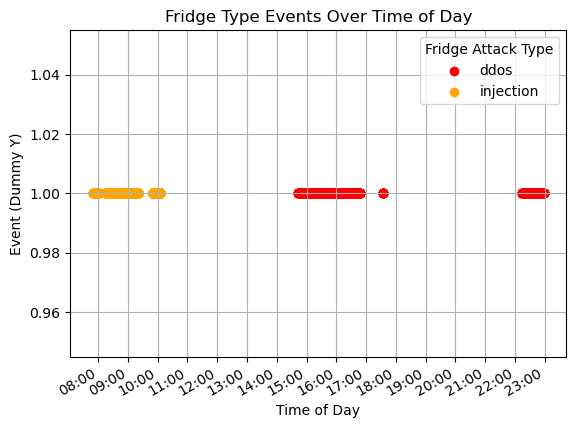

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_day is your DataFrame
colors = {
    'ddos': 'red',
    'xss': 'blue',
    'backdoor': 'green',
    'injection': 'orange',
    'normal': 'gray',
    'password': 'purple',
    'ransomware': 'brown',
    'scanning': 'cyan'
}  # Define colors for each Fridge_type

fig, ax = plt.subplots()

# Convert 'time' column to datetime object, handle errors by setting invalid values to NaT (Not a Time)
df_day['time'] = pd.to_datetime(df_day['time'], errors='coerce')

# Remove rows with NaT values
df_day = df_day.dropna(subset=['time'])

# Plot each Fridge_type separately to have a unique label and color
for Fridge_type, group in df_day.groupby('Fridge_type'):
    ax.scatter(group['time'], [1]*len(group), color=colors.get(Fridge_type, 'black'), label=Fridge_type)

# Formatting the x-axis to show time of day clearly
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()  # Rotation

plt.title('Fridge Type Events Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Event (Dummy Y)')
plt.grid(True)
plt.legend(title='Fridge Attack Type')  # Add a legend with a title
plt.show()


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\517479401.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['time'] = pd.to_datetime(df_day['time'], errors='coerce')


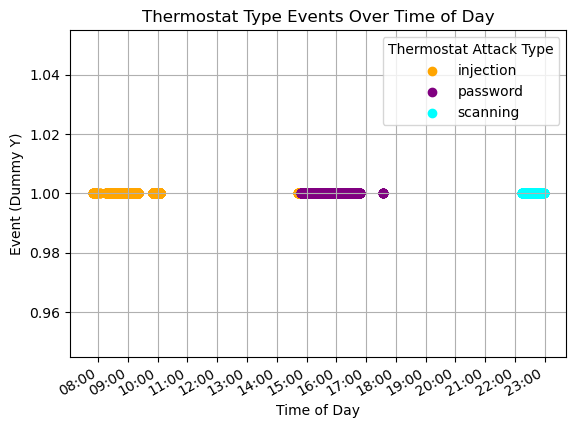

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_day is your DataFrame
colors = {
    'ddos': 'red',
    'xss': 'blue',
    'backdoor': 'green',
    'injection': 'orange',
    'normal': 'gray',
    'password': 'purple',
    'ransomware': 'brown',
    'scanning': 'cyan'
}  # Define colors for each Fridge_type

fig, ax = plt.subplots()

# Convert 'time' column to datetime object, handle errors by setting invalid values to NaT (Not a Time)
df_day['time'] = pd.to_datetime(df_day['time'], errors='coerce')

# Remove rows with NaT values
df_day = df_day.dropna(subset=['time'])

# Plot each Fridge_type separately to have a unique label and color
for Thermostat_type, group in df_day.groupby('Thermostat_type'):
    ax.scatter(group['time'], [1]*len(group), color=colors.get(Thermostat_type, 'black'), label=Thermostat_type)

# Formatting the x-axis to show time of day clearly
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()  # Rotation

plt.title('Thermostat Type Events Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Event (Dummy Y)')
plt.grid(True)
plt.legend(title='Thermostat Attack Type')  # Add a legend with a title
plt.show()


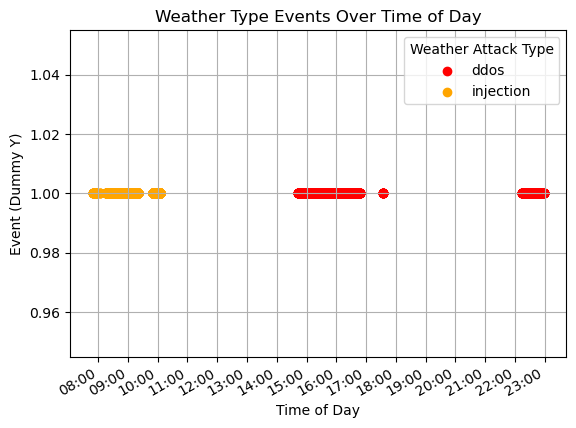

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_day is your DataFrame
colors = {
    'ddos': 'red',
    'xss': 'blue',
    'backdoor': 'green',
    'injection': 'orange',
    'normal': 'gray',
    'password': 'purple',
    'ransomware': 'brown',
    'scanning': 'cyan'
}  # Define colors for each Fridge_type

fig, ax = plt.subplots()

# Convert 'time' column to datetime object, handle errors by setting invalid values to NaT (Not a Time)
df_day['time'] = pd.to_datetime(df_day['time'], errors='coerce')

# Remove rows with NaT values
df_day = df_day.dropna(subset=['time'])

# Plot each Fridge_type separately to have a unique label and color
for Weather_type, group in df_day.groupby('Weather_type'):
    ax.scatter(group['time'], [1]*len(group), color=colors.get(Weather_type, 'black'), label=Weather_type)

# Formatting the x-axis to show time of day clearly
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()  # Rotation

plt.title('Weather Type Events Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Event (Dummy Y)')
plt.grid(True)
plt.legend(title='Weather Attack Type')  # Add a legend with a title
plt.show()


In [35]:
df.columns

Index(['date', 'time', 'fridge_temperature', 'temp_condition', 'Fridge_label',
       'Fridge_type', 'current_temperature', 'thermostat_status',
       'Thermostat_label', 'Thermostat_type', 'temperature', 'pressure',
       'humidity', 'Weather_label', 'Weather_type', 'datetime', 'day', 'month',
       'hour', 'minute'],
      dtype='object')

In [36]:
df1 = df[['day', 'month', 'hour', 'minute', 'fridge_temperature', 'temp_condition', 'Fridge_label', 'Fridge_type']]

In [37]:
df1

,day,month,hour,minute,fridge_temperature,temp_condition,Fridge_label,Fridge_type
0,25,4,19,19,9.00,high,1.0,ddos
1,25,4,19,19,9.25,high,1.0,ddos
2,25,4,19,19,12.65,high,1.0,ddos
3,25,4,19,19,4.65,low,1.0,ddos
4,25,4,19,19,12.65,high,1.0,ddos
...,...,...,...,...,...,...,...,...
111973,27,4,5,40,9.70,high,1.0,xss
111974,27,4,5,40,9.70,high,1.0,xss
111975,27,4,5,40,9.70,high,1.0,xss
111976,27,4,5,40,9.70,high,1.0,xss


In [38]:
# Assuming df is your DataFrame
df1['temp_condition'] = df1['temp_condition'].astype('category').cat.codes
df1['Fridge_type'] = df1['Fridge_type'].astype('category').cat.codes


C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\3150805755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temp_condition'] = df1['temp_condition'].astype('category').cat.codes
C:\Users\T 480\AppData\Local\Temp\ipykernel_22168\3150805755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fridge_type'] = df1['Fridge_type'].astype('category').cat.codes


In [39]:
df1

,day,month,hour,minute,fridge_temperature,temp_condition,Fridge_label,Fridge_type
0,25,4,19,19,9.00,0,1.0,1
1,25,4,19,19,9.25,0,1.0,1
2,25,4,19,19,12.65,0,1.0,1
3,25,4,19,19,4.65,3,1.0,1
4,25,4,19,19,12.65,0,1.0,1
...,...,...,...,...,...,...,...,...
111973,27,4,5,40,9.70,0,1.0,6
111974,27,4,5,40,9.70,0,1.0,6
111975,27,4,5,40,9.70,0,1.0,6
111976,27,4,5,40,9.70,0,1.0,6


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [41]:
# Separate features and target
X = df1.drop('Fridge_type', axis=1)
y = df1['Fridge_type']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)


In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.999940465559326
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4483
           1       1.00      1.00      1.00      3202
           2       1.00      1.00      1.00      4503
           3       1.00      1.00      1.00     13528
           4       1.00      1.00      1.00      4509
           5       1.00      1.00      1.00      2363
           6       1.00      1.00      1.00      1006

    accuracy                           1.00     33594
   macro avg       1.00      1.00      1.00     33594
weighted avg       1.00      1.00      1.00     33594



In [45]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 4481     0     0     0     0     2     0]
 [    0  3202     0     0     0     0     0]
 [    0     0  4503     0     0     0     0]
 [    0     0     0 13528     0     0     0]
 [    0     0     0     0  4509     0     0]
 [    0     0     0     0     0  2363     0]
 [    0     0     0     0     0     0  1006]]


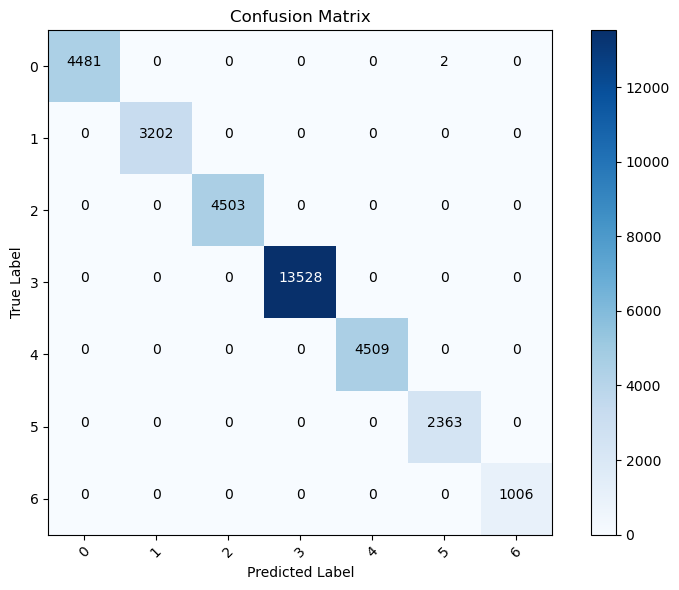

In [46]:
import numpy as np
# Plotting the confusion matrix using matplotlib only
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Assuming y contains the class labels
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()